# Titanic data analysis

The data this notebook uses is from the Kaggle Tittanic Challenge.
If you want you can checkout the dataset [here](https://www.kaggle.com/c/titanic/data).<br/>
Note: A account is necessary to download the .csv file!

##  Getting Started with importing libaries and data

In [5]:
#Imports
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Importing the downloaded data.
# Notice: Path is not necessary if data is stored at the same location as the Juypter Notebook
titanic_df = pd.read_csv('train.csv')

In [7]:
# Take a short look at the dataset by displaying the first 10 rows
titanic_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
# Looking up the pandas info-function
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1. Question: Who were the passengers on the Titanic ?

Sex
female    314
male      577
dtype: int64


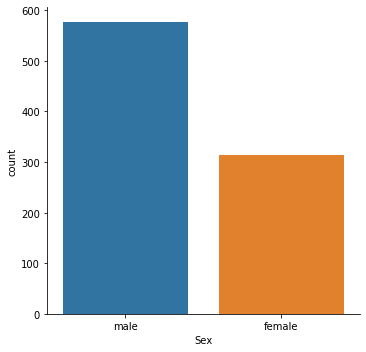

In [9]:
# The first thing to check is how many male and female persons were on board

# Numbers
print(titanic_df.groupby('Sex').size())

# Or just plot the data
sns.catplot('Sex',data=titanic_df,kind="count")




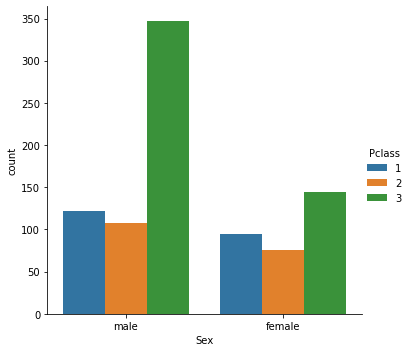

In [10]:
# We can also split up these groups by the class the males/females are in
sns.catplot(x='Sex',data=titanic_df,kind="count",hue="Pclass")

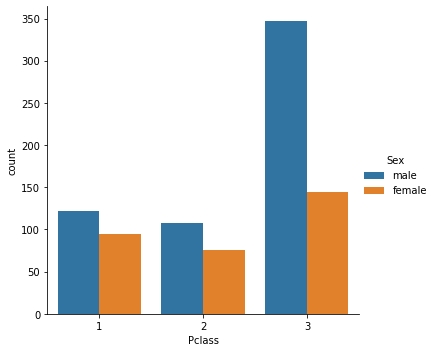

In [11]:
# Changing the 'hue' and the 'x-axis' shows even better that most of the persons travelled in the third class were male
sns.catplot("Pclass",data=titanic_df,kind="count",hue="Sex")

Now we want to take a closer look at the famous qoute "Women and children first!".<br/> To do that we need some new column with a seperation between man,women and children.

In [12]:
# Define a class that seperates passengers older then 16 from passengers younger than 16
def male_femlae_child(passenger):
    age,sex =passenger 
    
    if age < 16:
        return 'child'
    else:
        return sex

In [13]:
# Create new column named 'Person' wihich separates between men,female and child
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_femlae_child,axis=1)

In [14]:
# Display some random rows to see if everything worked
titanic_df[10:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,male
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,male
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,child
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,female
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,child
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,male
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,female
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,female


male      537
female    271
child      83
Name: Person, dtype: int64


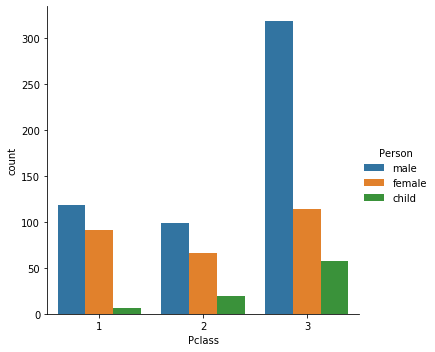

In [15]:
# Again with hard numbers this time using the value_counts() function
print(titanic_df['Person'].value_counts())

# And the same plot as before, but now with the 'Person' column as 'hue'
sns.catplot("Pclass",data=titanic_df,kind="count",hue="Person")


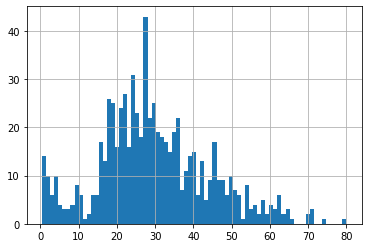

In [16]:
# Take a closer look at the age on board
titanic_df['Age'].hist(bins=75)

In [17]:
# Of course we also want to now the mean age on deck
titanic_df['Age'].mean()

29.69911764705882

Another great way to visualize data are **KDE-plots**

### Definition
Let ($x_1, x_2, …, x_n$) be a univariate independent and identically distributed sample drawn from some distribution with an unknown density ƒ. We are interested in estimating the shape of this function ƒ. Its kernel density estimator is
$$f_h=\frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x-x_i}{h}\right)$$
where:
* $K$ is the Kernel
* $h$ >0 is a smooting parameter called bandwidth

<br/> Read more about them on [Wikipedia](www.Wikipedia.com) if you aren't familiar  with it yet !

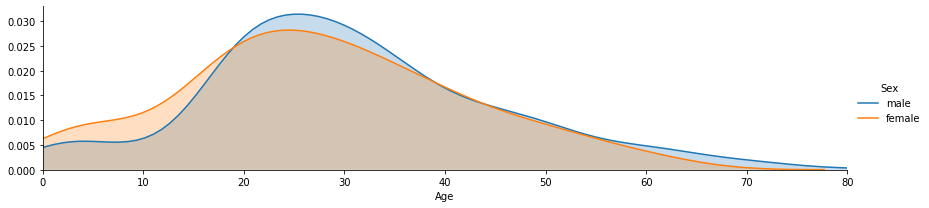

In [18]:
# Let's look again at the distribution of age with the hue 'Sex'
fig =sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

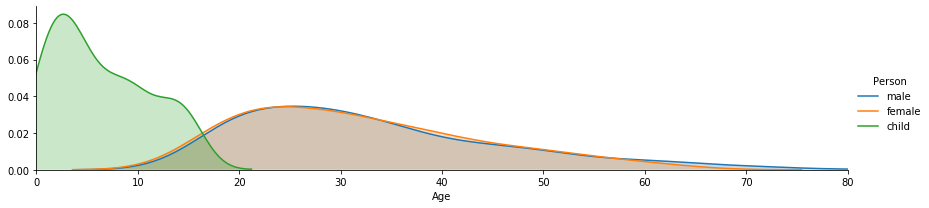

In [19]:
# And with the hue 'Person'
fig =sns.FacetGrid(titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

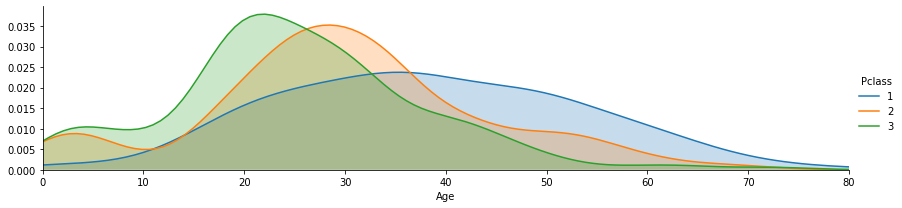

In [20]:
# Another variant with the hue 'Pclass'
fig =sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

## 2. Question: What deck were the passengers on ?

In [21]:
# Because a lot of the rows got Nan values in their 'Cabin' cloumn we need to drop the rows without information
deck =titanic_df['Cabin'].dropna()

In [22]:
# Check the object we created
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

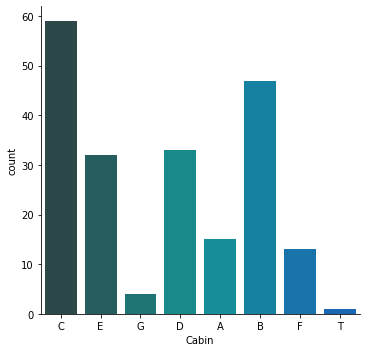

In [23]:
# we arent really interested in the room numbers so we cut them of and plot the levels only
levels =[]


for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns =['Cabin']
sns.catplot("Cabin",data=cabin_df,kind="count",palette="winter_d")

 


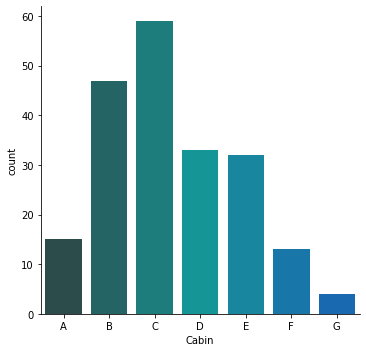

In [24]:
# Because of it's unnecessary size we drop the T Deck and we sort the diagram by the letter of the decks

cabin_df = cabin_df[cabin_df!= "T"]
cabin_df = cabin_df.sort_values(by='Cabin')
sns.catplot("Cabin",data=cabin_df,kind="count",palette="winter_d")

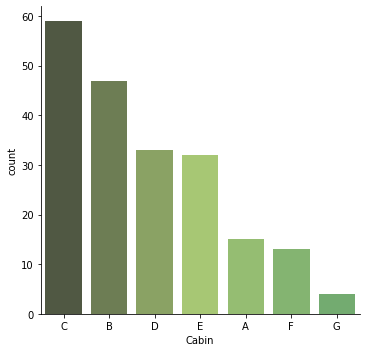

In [25]:
# If needed we could also sort by count
sns.catplot("Cabin",data=cabin_df,kind="count",palette="summer_d", order=cabin_df['Cabin'].value_counts().index)

## 3. Question: Where did the passengers come from ?

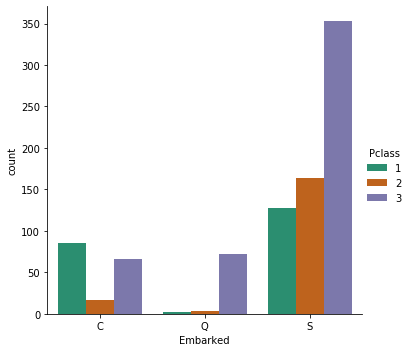

In [26]:
# We can make a quick catplot to ckeck out where the passengers boarded
sns.catplot("Embarked",data=titanic_df,kind="count",palette="Dark2",hue='Pclass',order=['C','Q','S'])

## 4. Question: Who was alone and who was with family ?

In [27]:
# Create a 'Alone' column by adding the siblings (SibSp) and the parent/child (Parch) column
titanic_df['Alone']= titanic_df['SibSp']+ titanic_df['Parch']

In [28]:
# Quick check
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
Alone          891 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [29]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [30]:
# If the value of the 'Alone' column is 0 we expect the person travelling alone, else With family
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [31]:
# Check by looking at the set
titanic_df[10:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,male,Alone
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,male,With Family
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,child,Alone
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,female,Alone
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,child,With Family
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,male,Alone
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,female,With Family
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,female,Alone


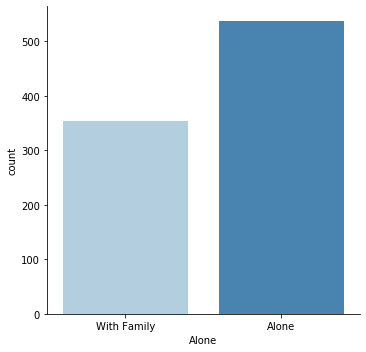

In [32]:
# Simple visualization 
sns.catplot("Alone",data=titanic_df,kind="count",palette="Blues")

## 5. Question: How many people survived and does that relate to their class ?

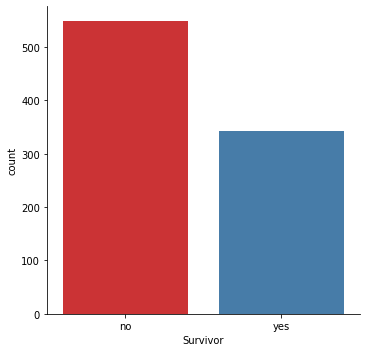

In [33]:
# Just create anf plot the Survivor column
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.catplot("Survivor",data=titanic_df,kind="count",palette="Set1")

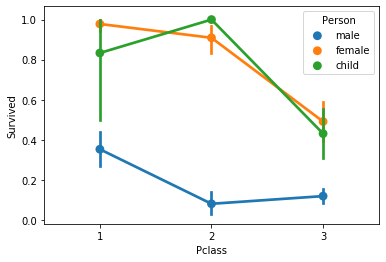

In [34]:
# So let's look up if the class was a factor for surviving
sns.pointplot(x="Pclass", y="Survived", data=titanic_df, hue="Person")

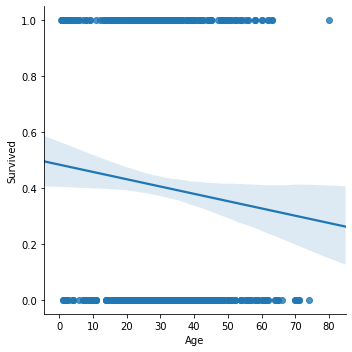

In [35]:
# Like seen here age was another factor for survivibg chance
sns.lmplot('Age','Survived',data=titanic_df)

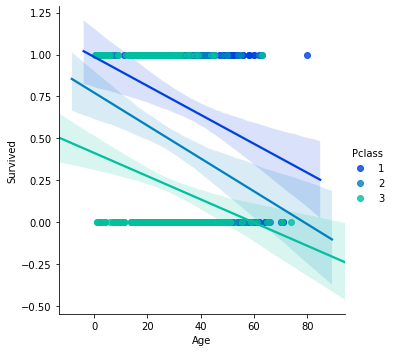

In [36]:
# Same plot Passing the hue 'Pclass'
sns.lmplot('Age','Survived',data=titanic_df,hue="Pclass",palette="winter")

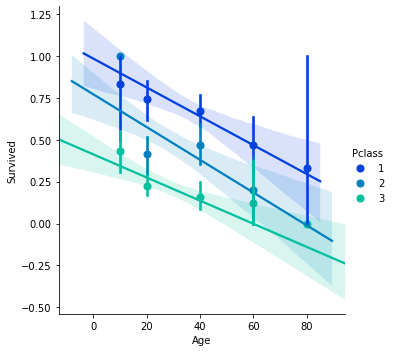

In [37]:
# We could pass a generations list so that not every point is displayed on the graph
generations= [10,20,40,60,80]
sns.lmplot('Age','Survived',data = titanic_df,hue='Pclass',palette="winter",x_bins=generations)

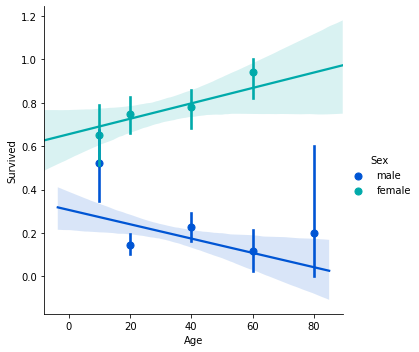

In [38]:
# What if we relate gender and age with the survival set?
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

## 6. Question: Did having a family member increase the odds of surviving the crash ? 

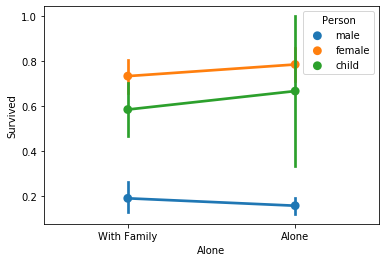

In [39]:
sns.pointplot(x="Alone", y="Survived", data=titanic_df, hue="Person")

In [40]:
## 7. Question: Did the deck have an effect on the passengers survival rate ?

In [41]:
# Drop the Nan values in the 'Cabin' column
cabinset_titanic_df = titanic_df.dropna(subset=['Cabin'])

In [42]:
import warnings
warnings.filterwarnings('ignore')
# Create a deck column and remove the 'T' deck from the set
cabinset_titanic_df['Deck']= cabinset_titanic_df['Cabin'].str[0]
cabinset_titanic_df = cabinset_titanic_df[cabinset_titanic_df['Deck']!= "T"]

In [43]:
# look up what we just created
cabinset_titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes,C


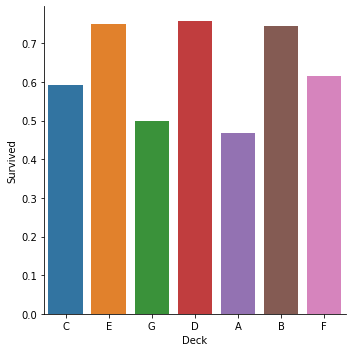

In [44]:
# Now plot the 'Survived' column over the 'Deck' column
sns.catplot(x="Deck", y="Survived", data=cabinset_titanic_df,kind="bar",ci=None)